Anomaly Detection, also known as outlier detection, is the identification of events or observations that deviate significantly from the majority of the data and do not conform to well-defined notion of normal behaviour. (S)ARIMA, a method for detecting deviation from static location parameters from the underlying distribution. It performs well when dealing with data points and events labeled "anomaly" with the binary classification logic. They are not designed to capture the temporal/spatial correlation pattern between the data points. 

RNN - Autoencoder : The encoder is a NN trained to encode the input sequence into a compact representation called the latent vector. The decoder does the opposite by trying to reconstruct the input sequence starting from its compressed encoded representation. To determine whether an input sequence is anomalous, it is compared with autoencoder output. If the reconstruction error exceeds a chosen threshold, the sequence is considered anomalous.

The training strategy to achieve high accuracy consists of training the autoencoder only on normal data, i.e., when the system that generates the data works properly. With the anamolous sequences, the output is expected to deviate significantly by at least a chosen meaningful threshold.

In [102]:
import pandas
import matplotlib.pyplot as plt
import numpy
from tqdm import tqdm

In [103]:
dataframe = pandas.read_csv('/Applications/ML projects/Anomaly Detection - Pump Sensor /Dataset/sensor.csv')
dataframe.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [104]:
machine_status = list(dataframe['machine_status'])
machine_status[:5]

['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL']

In [105]:
target = list()
for status in machine_status:
    if status == 'NORMAL':
        target.append('0')
    else:
        target.append('1')
dataframe.drop('machine_status', axis=1, inplace=True)
dataframe['target'] = target
dataframe.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,target
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0


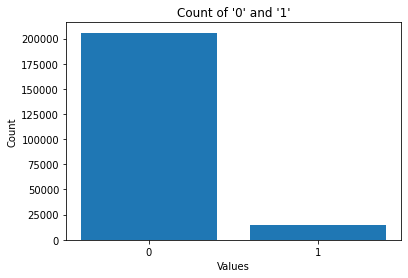

In [106]:
target_series = pandas.Series(target)
target_counts = target_series.value_counts()
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title("Count of '0' and '1'")
plt.show()

In [107]:
sensor_02 = list(dataframe['sensor_02'])
target = list(dataframe['target'])
print(sensor_02[:5], target[:5])

[53.2118, 53.2118, 53.2118, 53.1684, 53.2118] ['0', '0', '0', '0', '0']


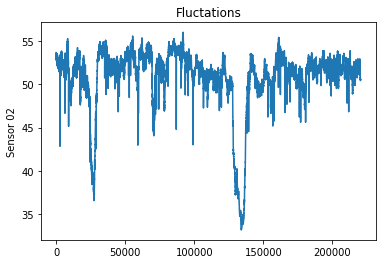

In [108]:
sensor_02_series = pandas.Series(sensor_02)
plt.plot(range(1, len(sensor_02) + 1), sensor_02_series)
plt.ylabel('Sensor 02')
plt.title('Fluctations')
plt.show()

In [111]:
sensor_02 = numpy.array(sensor_02)
target = numpy.array(target)

In [112]:
numpy.isnan(sensor_02).any()

True

In [113]:
mask = numpy.isnan(sensor_02)
sensor_02 = numpy.array(list(sensor_02[~mask]))
target = numpy.array(list(target[~mask]))

In [116]:
print(len(sensor_02), len(dataframe['sensor_02']))

220301 220320


In [119]:
normal_points = list()
for idx in range(len(sensor_02)):
    if target[idx] == '0':
        normal_points.append(sensor_02[idx])
normal_points = numpy.array(normal_points)
normal_points.shape

(205822,)

In [91]:
from torch import nn
import torch
import copy

In [120]:
sensor_02_tensor = torch.from_numpy(sensor_02)
normal_points = torch.from_numpy(normal_points)

In [121]:
mean = normal_points.mean()
std = normal_points.std()

In [122]:
print(mean, std)

tensor(51.6369, dtype=torch.float64) tensor(1.8783, dtype=torch.float64)


In [123]:
normalized_s02_tensor = (sensor_02_tensor - mean) / std

In [124]:
normalized_s02_tensor[0]

tensor(0.8384, dtype=torch.float64)

In [125]:
print(len(normalized_s02_tensor), len(target))

220301 220301


In [133]:
hourly_sequences = list()
target_counts = list()
for i in tqdm(range(0, len(normalized_s02_tensor), 45)):
    sequence = []
    target_count = 0
    if i + 60 > len(sensor_02):
        break
    for j in range(i, i + 60):
        sequence.append(normalized_s02_tensor[j])
        if target[j] != '0':
            target_count += 1
    hourly_sequences.append(torch.stack(sequence))
    target_counts.append(target_count)

100%|█████████▉| 4895/4896 [00:00<00:00, 7473.29it/s]


In [134]:
hourly_sequences_tensor = torch.stack(hourly_sequences)
target_counts_tensor = torch.tensor(target_counts)

In [135]:
hourly_sequences_tensor.shape

torch.Size([4895, 60])

In [136]:
target_counts_tensor.shape

torch.Size([4895])

In [137]:
print(hourly_sequences_tensor[0])

tensor([0.8384, 0.8384, 0.8384, 0.8153, 0.8384, 0.8153, 0.8153, 0.8153, 0.8153,
        0.8153, 0.7922, 0.8153, 0.7922, 0.8153, 0.8153, 0.7922, 0.8153, 1.0926,
        0.7922, 0.8153, 0.7460, 0.7922, 0.7922, 0.8153, 0.7460, 0.8153, 0.8153,
        0.7922, 0.8153, 0.7922, 0.7922, 0.7922, 0.7460, 0.7922, 0.7922, 0.7922,
        0.7922, 0.7460, 0.7922, 0.7922, 0.7922, 0.7922, 0.7922, 0.7922, 0.7922,
        0.7460, 0.7922, 0.7460, 0.7922, 0.7922, 0.7922, 0.7922, 0.7922, 0.7922,
        0.7460, 0.7922, 0.7922, 0.8153, 0.7922, 0.8153], dtype=torch.float64)


In [138]:
target_counts_tensor[0]

tensor(0)

In [141]:
anomalies = list()
for idx in range(len(target_counts_tensor)):
    if target_counts_tensor[idx] != 0 and target_counts_tensor[idx] != 60:
        anomalies.append(target_counts_tensor[idx])
print(anomalies)

[tensor(5), tensor(50), tensor(55), tensor(10), tensor(30), tensor(35), tensor(6), tensor(51), tensor(17), tensor(39), tensor(42), tensor(9), tensor(54), tensor(23), tensor(17), tensor(40), tensor(1), tensor(46), tensor(45)]


In [142]:
anomaly_sequences = list()
normal_sequences = list()
for idx in range(len(target_counts_tensor)):
    if target_counts_tensor[idx] in anomalies:
        anomaly_sequences.append(hourly_sequences_tensor[idx])
    else:
        normal_sequences.append(hourly_sequences_tensor[idx])
normal_sequences = torch.stack(normal_sequences)
anomaly_sequences = torch.stack(anomaly_sequences)

In [143]:
normal_sequences.shape

torch.Size([4876, 60])

In [144]:
anomaly_sequences.shape

torch.Size([19, 60])

In [172]:
import random

In [179]:
temp = list(normal_sequences)
random.shuffle(temp)
normal_sequences = torch.stack(temp)
train_pivot = int(0.85 * len(normal_sequences))
val_pivot = int(0.90 * len(normal_sequences))
train_dataset = normal_sequences[:train_pivot].float()
val_dataset = normal_sequences[train_pivot:val_pivot].float()
test_dataset = normal_sequences[val_pivot:].float()
print(train_dataset.shape, val_dataset.shape, test_dataset.shape)

torch.Size([4144, 60]) torch.Size([244, 60]) torch.Size([488, 60])


In [186]:
class LSTM_Encoder(nn.Module):
    def __init__(self, n_features=1, seq_len=60, embedding_dim=20):
        super(LSTM_Encoder, self).__init__()
        self.n_features = n_features
        self.seq_len = seq_len
        self.embedding_dim = embedding_dim
        self.rnn = nn.LSTM(
            input_size=n_features,
            hidden_size=embedding_dim,
            num_layers=1,
            batch_first=True
        )

    def forward(self, x):
        x = x.reshape((1, self.seq_len, self.n_features))
        _, (hidden_n, _) = self.rnn(x)
        return hidden_n.reshape((self.n_features, self.embedding_dim))

In [187]:
class LSTM_Decoder(nn.Module):
  def __init__(self, n_features=1, seq_len=60, input_dim=20):
    super(LSTM_Decoder, self).__init__()
    self.seq_len = seq_len
    self.input_dim = input_dim
    self.hidden_dim = 2 * input_dim
    self.n_features = n_features
    self.rnn = nn.LSTM(
      input_size=input_dim,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )
    self.output_layer = nn.Linear(self.hidden_dim, n_features)

  def forward(self, x):
    x = x.repeat(self.seq_len, self.n_features)
    x = x.reshape((self.n_features, self.seq_len, self.input_dim))
    x, (hidden_n, cell_n) = self.rnn(x)
    x = x.reshape((self.seq_len, self.hidden_dim))
    return self.output_layer(x)

In [188]:
class LSTM_Model(nn.Module):
    def __init__(self, n_features=1, seq_len=60, embedding_dim=20):
        super(LSTM_Model, self).__init__()
        self.encoder = LSTM_Encoder(n_features, seq_len, embedding_dim)
        self.decoder = LSTM_Decoder(n_features, seq_len, embedding_dim)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [189]:
model = LSTM_Model()

In [190]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.L1Loss(reduction='sum').to(device)
history = dict(train=[], val=[])
best_loss = 10000.0
best_model_wts = copy.deepcopy(model.state_dict())

In [191]:
for epoch in range(50):
    model = model.train()
    train_losses = []
    for seq in train_dataset:
        seq = seq.to(device)
        pred_seq = model(seq)
        pred_seq = pred_seq.reshape(seq.shape)
        loss = criterion(pred_seq, seq)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    val_losses = []
    model = model.eval()
    with torch.no_grad():
        for seq in val_dataset:
            seq = seq.to(device)
            pred_seq = model(seq)
            pred_seq = pred_seq.reshape(seq.shape)
            loss = criterion(pred_seq, seq)
            val_losses.append(loss.item())

    train_loss = numpy.mean(train_losses)
    val_loss   = numpy.mean(val_losses)

    history['train'].append(train_loss)
    history['val'].append(val_loss)

    if val_loss < best_loss:
        best_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())

    print("EPOCH - " + str(epoch) + " : Train Loss = " + str(train_loss) + " ,Val Loss = " + str(val_loss))

EPOCH - 0 : Train Loss = 9.730366530479381 ,Val Loss = 6.5627237333626045
EPOCH - 1 : Train Loss = 5.918979464659762 ,Val Loss = 4.658695156456994
EPOCH - 2 : Train Loss = 5.343626740838052 ,Val Loss = 4.67709760856433
EPOCH - 3 : Train Loss = 5.271744716783058 ,Val Loss = 4.647610988773283
EPOCH - 4 : Train Loss = 5.093035379431883 ,Val Loss = 4.603785372659808
EPOCH - 5 : Train Loss = 5.08066578632271 ,Val Loss = 4.595159101681631
EPOCH - 6 : Train Loss = 4.8739126288695225 ,Val Loss = 4.227036839381594
EPOCH - 7 : Train Loss = 4.880776775907366 ,Val Loss = 4.558957164649104
EPOCH - 8 : Train Loss = 4.891469637320366 ,Val Loss = 4.318388424203044
EPOCH - 9 : Train Loss = 4.763186429033926 ,Val Loss = 4.426135258840733
EPOCH - 10 : Train Loss = 4.719174558203308 ,Val Loss = 4.706249082186183
EPOCH - 11 : Train Loss = 4.531845506424494 ,Val Loss = 4.567164915995519
EPOCH - 12 : Train Loss = 4.619096744848725 ,Val Loss = 4.195234423778096
EPOCH - 13 : Train Loss = 4.5046179584123225 ,Va

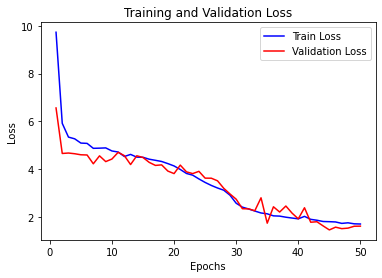

In [258]:
epochs = range(1, len(history['train']) + 1)
plt.plot(epochs, history['train'], 'b', label='Train Loss')
plt.plot(epochs, history['val'], 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [192]:
torch.save(model.state_dict(), '/Applications/ML projects/Anomaly Detection - Pump Sensor /Model/model.pth')

In [193]:
path = '/Applications/ML projects/Anomaly Detection - Pump Sensor /Model/model.pth'
model = LSTM_Model()
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [196]:
anomaly_dataset = anomaly_sequences.clone().float()

In [197]:
anomaly_dataset[0]

tensor([0.7229, 0.7229, 0.7229, 0.7229, 0.7460, 0.7229, 0.7229, 0.7229, 0.7460,
        0.7460, 0.7229, 0.7460, 0.7460, 0.7229, 0.7229, 0.7229, 0.7229, 0.7229,
        0.7229, 0.7229, 0.7229, 0.7229, 0.7229, 0.7229, 0.7229, 0.7229, 0.7229,
        0.7229, 0.6998, 0.7229, 0.7229, 0.6998, 0.7229, 0.7460, 0.7229, 0.7229,
        0.7229, 0.7460, 0.7229, 0.7229, 0.7229, 0.7229, 0.7229, 0.7229, 0.7460,
        0.7460, 0.7460, 0.7229, 0.6998, 0.6998, 0.6998, 0.6998, 0.6767, 0.6305,
        0.6305, 0.6305, 0.6074, 0.6074, 0.5612, 0.5843])

In [243]:
def get_loss(dataset):
    losses = []
    for seq in dataset:
        seq = seq.to(device)
        pred_seq = model(seq)
        pred_seq = pred_seq.reshape(seq.shape)
        loss = criterion(pred_seq, seq)
        losses.append(loss.item())
    return sum(losses) / len(losses)

In [244]:
train_loss = get_loss(train_dataset)
train_loss

1.6811320554450673

In [245]:
val_loss = get_loss(val_dataset)
val_loss

1.6177693903446198

In [246]:
test_loss = get_loss(test_dataset)
test_loss

1.687225608063526

In [247]:
anomaly_loss = get_loss(anomaly_dataset)
anomaly_loss

4.38264346750159

In [249]:
type(hourly_sequences_tensor)

torch.Tensor

In [250]:
sequences = hourly_sequences_tensor.float()
sequences.shape

torch.Size([4895, 60])

In [251]:
target_counts_tensor.shape

torch.Size([4895])

In [257]:
tp = 0
threshold = 3.0
for idx in range(sequences.shape[0]):
    seq = sequences[idx]
    tar = target_counts_tensor[idx]
    seq = seq.to(device)
    pred_seq = model(seq)
    pred_seq = pred_seq.reshape(seq.shape)
    loss = criterion(pred_seq, seq).item()
    if (loss < threshold and (tar == 0 or tar == 60)):
        tp += 1
    elif (loss > threshold and tar != 0 and tar != 60):
        tp += 1
print("Accuracy: ", (tp / sequences.shape[0]) * 100)

Accuracy:  90.88866189989785


Threshold = 3.00;  Accuracy = 90.89